# Image Processing with Neural Network
## Session 17g

##  Yolo V5

<img src='../../../prasami_images/prasami_color_tutorials_small.png' style = 'width:400px;' alt="By Pramod Sharma : pramod.sharma@prasami.com"/>


In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import shutil

from tqdm.notebook import tqdm
import tqdm.notebook as tq

from IPython.display import Image, clear_output

In [2]:
# Some basic parameters

inpDir = '../output' # Racoon dataset is stored here
outDir = '../output' # location to store outputs

dataDir = 'GarbYolo' # location of the data
imgDir = 'images' # location of the images
labelDir = 'labels'
modelDir = '../models'
altName = 'yolo'

RANDOM_STATE = 24 # for initialization ----- REMEMBER: to remove at the time of promotion to production
EPOCHS = 100 # number of cycles to run

# Set parameters for decoration of plots
params = {'legend.fontsize' : 'large',
          'figure.figsize'  : (15,6),
          'axes.labelsize'  : 'x-large',
          'axes.titlesize'  :'x-large',
          'xtick.labelsize' :'large',
          'ytick.labelsize' :'large'
         }

plt.rcParams.update(params) # update rcParams

## Helper Function

In [3]:
image_types = (".jpg", ".jpeg", ".png", ".bmp", ".tif", ".tiff")


def fn_list_images(basePath, contains=None):
    # return the set of files that are valid
    return fn_list_files(basePath, validExts=image_types, contains=contains)


def fn_list_files(basePath, validExts=None, contains=None):
    
    for (rootDir, dirNames, filenames) in os.walk(basePath): # loop over the directory structure
        
        for filename in filenames: # loop over the filenames in the current directory
            
            # if the contains string is not none and the filename does not contain
            # the supplied string, then ignore the file
            if contains is not None and filename.find(contains) == -1:
                continue

            # determine the file extension of the current file
            ext = filename[filename.rfind("."):].lower()

            # check to see if the file is an image and should be processed
            if validExts is None or ext.endswith(validExts):
                
                # construct the path to the image and yield it
                imagePath = os.path.join(rootDir, filename)
                
                yield imagePath

In [4]:
def fn_display_images(im_lst):

    # set up the canvas for the subplots
    plt.figure()


    for i in range(1, 33):

        index = np.random.randint(1, len(im_lst))

        # Load an image
        imgPath = img_lst[index]
        image = plt.imread(imgPath)
        #image = cv2.resize(image, (IMAGE_SIZE, IMAGE_SIZE))

        plt.subplot(4,8,i)

        plt.imshow(image)
        plt.axis('off')
    plt.show()

## Overview

In [5]:
class_names_dict = {'cardboard':0,
                    'glass':1,
                    'metal':2,
                    'paper':3,
                    'plastic':4,
                    'trash':5}

basePath = 'yolov5/base_dir'

In [6]:
# Move Folders in output dir to data_dir under yolo
p = os.path.join(basePath, labelDir)

if not os.path.isdir(p):
    srcLabels = os.path.join(outDir, dataDir, labelDir)
    shutil.move(srcLabels, basePath)
else:
    print (f'Directory {p} exists...')

Directory yolov5/base_dir/labels exists...


In [7]:
# Move Folders in output dir to data_dir under yolo
p = os.path.join(basePath, imgDir)

if not os.path.isdir(p):
    srcImages = os.path.join(outDir, dataDir, imgDir)
    shutil.move(srcImages, basePath)
else:
    print (f'Directory {p} exists...')

Directory yolov5/base_dir/images exists...


In [8]:
img_lst = list(fn_list_images(os.path.join(basePath, imgDir)))
len(img_lst)

2527

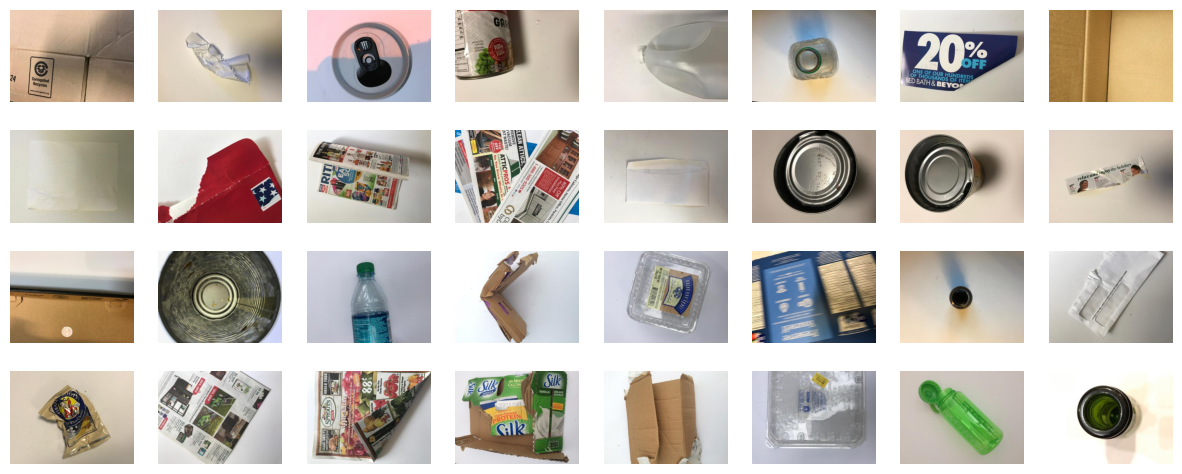

In [9]:
## Display a few images

fn_display_images(img_lst)

In [10]:
print(len(os.listdir('yolov5/base_dir/images/train')))
print(len(os.listdir('yolov5/base_dir/images/validation')))

print(len(os.listdir('yolov5/base_dir/labels/train')))
print(len(os.listdir('yolov5/base_dir/labels/validation')))

2021
506
2021
506


In [11]:
text_file_list = os.listdir('yolov5/base_dir/labels/train')

text_file = text_file_list[0]

text_file

'glass422.txt'

In [12]:
! cat 'yolov5/base_dir/labels/train/metal396.txt'

2, 0.5634765625, 0.6809895833333334, 0.873046875, 0.6380208333333334

In [13]:

yaml_dict = {'train': 'base_dir/images/train',      # path to the train folder
            'val': 'base_dir/images/validation',    # path to the val folder
            'nc': 6,                                # number of classes
            'names': [*class_names_dict]}           # list of label names

In [14]:
# Create the yaml file called my_data.yaml
# We will save this file inside the yolov5 folder.

import yaml

with open(r'yolov5/my_data.yaml', 'w') as file:
    documents = yaml.dump(yaml_dict, file)

In [15]:
# Display the contents of the yaml file

! cat 'yolov5/my_data.yaml'

names:
- cardboard
- glass
- metal
- paper
- plastic
- trash
nc: 6
train: base_dir/images/train
val: base_dir/images/validation


In [16]:

os.chdir('./yolov5')

!pwd

/home/pks/01_projects/CDAC/DUASP/ImageProcessingDNN/notebooks/yolov5


In [17]:
#!python detect.py --weights yolov5s.pt --img 640 --conf 0.25 --source data/images/ --save-txt --save-conf --exist-ok

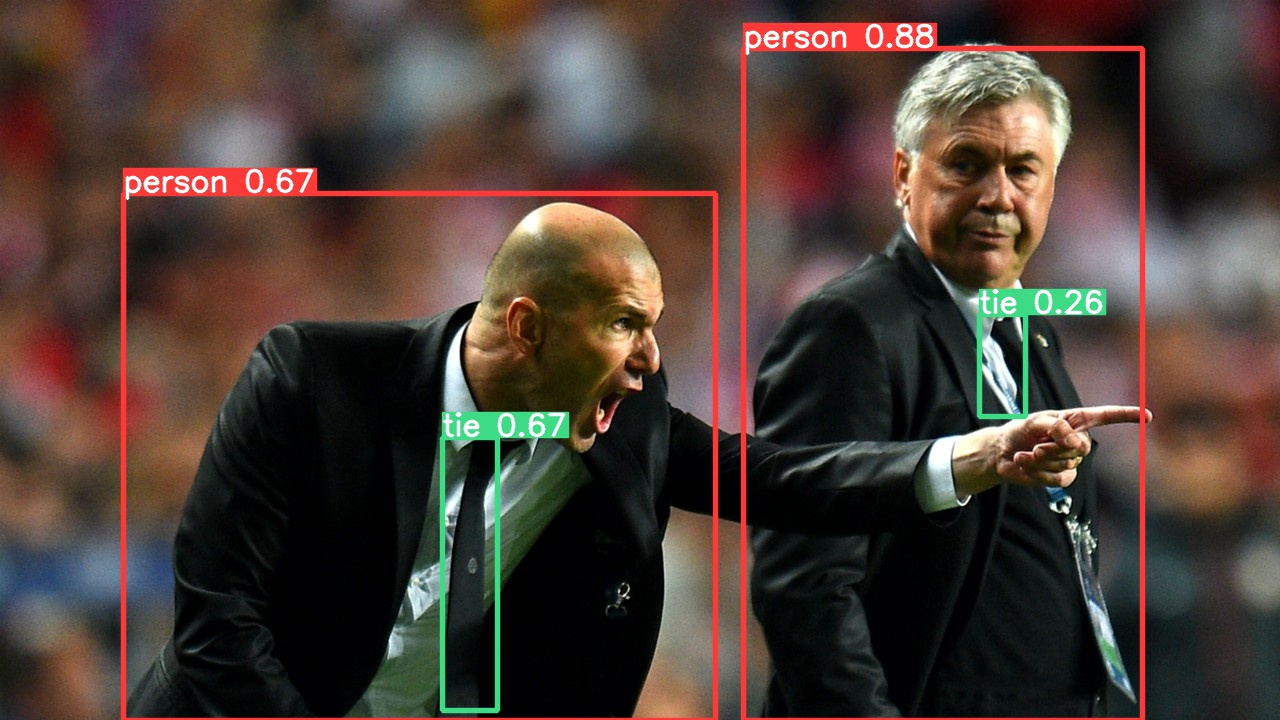

In [18]:
Image(filename='runs/detect/exp/zidane.jpg', width=600)

In [19]:
# get a list of detect experiments
exp_list = os.listdir('runs/detect/')
exp_list

['exp']

In [20]:
# path = f'runs/detect/exp/labels/zidane.txt'

# cols = ['class', 'x-center', 'y-center', 'width', 'height', 'conf-score']

# df = pd.read_csv(path, sep=" ", header=None)

# df.columns = cols

# df.head()

In [21]:
# Not caching images
#!WANDB_MODE="dryrun" python train.py --img 640 --batch 16 --epochs 200 --data my_data.yaml --weights yolov5s.pt

## Where are model weights

In [22]:
# get a list of experiments
exp_list = os.listdir('runs/train/')

# Get the latest exp. Generally first item on the list is latest
exp = exp_list[0]

exp

'exp'

In [23]:
os.listdir(f'runs/train/{exp}/weights')

['last.pt', 'best.pt']

## Running an Inference

In [28]:
!python detect.py --source '/home/pks/01_projects/CDAC/input/garbage_test/garbage_test_2.png' --weights 'runs/train/exp/weights/best.pt' --img 640 --save-txt --save-conf --exist-ok

detect: weights=['runs/train/exp/weights/best.pt'], source=/home/pks/01_projects/CDAC/input/garbage_test/garbage_test_2.png, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=True, save_conf=True, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=True, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False
YOLOv5 🚀 2022-7-13 Python-3.10.12 torch-2.5.1+cu124 CUDA:0 (NVIDIA GeForce RTX 3060 Laptop GPU, 5842MiB)

/home/pks/01_projects/CDAC/DUASP/ImageProcessingDNN/notebooks/yolov5/models/experimental.py:80: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/ma

In [29]:
# get a list of detect experiments
exp_list = os.listdir('runs/detect/')

#latest_index = len(exp_list) - 1

# Get the latest experiment

# ** NOTE: Here the latest experiment is sometimes the last element in the list and
# sometimes it's the first element in the list. Could be a bug. **
# This is not the same as for training experiments.
detect_exp = exp_list[0]

detect_exp

'exp'

In [30]:
pred_list = os.listdir(f'runs/detect/{detect_exp}')
pred_list

['garbage_test.jpg',
 'zidane.jpg',
 'glass52.jpg',
 'garbage_test_2.png',
 'labels',
 'bus.jpg',
 'plastic1.jpg',
 'garbage_test_1.png']

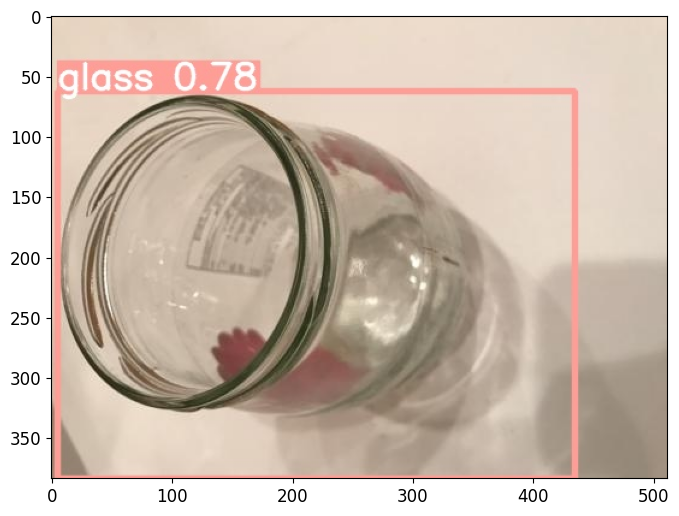

In [31]:
image_id = pred_list[2]

path = f'runs/detect/{detect_exp}/' + image_id
image = plt.imread(path)

plt.imshow(image)